In [50]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from timerun import time_code, time_func
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the madelon training dataset
train_data = pd.read_table("MADELON/madelon_train.data", sep=' ', header=None, usecols=range(0,500))
train_labels = pd.read_table("MADELON/madelon_train.labels", sep=' ', header=None)
X_train, X_test = np.split(train_data.to_numpy(), [1600])
y_train, y_test = np.split(np.ravel(train_labels.to_numpy()), [1600])

In [49]:
import random
def randomSelection(CVal):
    random_scores_train = {}
    random_scores_test = {}
    random_selection = random.sample(range(0, 500), 500)
    for i in range(1, 500, 2):
        features = random_selection[:i]
    
        svm = LinearSVC(C=CVal, max_iter=2000, dual=False)
        svm.fit(X_train[:,features], y_train)

        random_scores_train[i] = svm.score(X_train[:,features], y_train)
        random_scores_test[i] = svm.score(X_test[:,features], y_test)
    return random_scores_train, random_scores_test

def kfold(X, y, k):
    n = int(X.shape[0]/k)
    Xfolds = np.split(X, list(range(n, n*k, n)))
    yfolds = np.split(y, list(range(n, n*k, n)))

    folds = []
    for i in range(k):
        XT = np.concatenate(Xfolds[:i] + Xfolds[i+1:])
        yT = np.concatenate(yfolds[:i] + yfolds[i+1:])
        Xt = Xfolds[i]
        yt = yfolds[i]
        folds += [(XT, yT, Xt, yt)]

    return folds

scores = []
for i in range(0,3):
    fold_scores = []
    CVal = 10**i
    for XT, yT, Xt, yt in kfold(X_train, y_train, 4):
        svm = LinearSVC(C=CVal, max_iter=2000, dual=False)    
        svm.fit(XT, yT)
        fold_scores += [svm.score(Xt, yt)]
        print(CVal, fold_scores)
    scores += [[np.mean(fold_scores), np.var(fold_scores)]]
    print(scores)

1 [0.495]
1 [0.495, 0.55]
1 [0.495, 0.55, 0.51]
1 [0.495, 0.55, 0.51, 0.575]
[[0.5325, 0.0010062499999999993]]
10 [0.495]
10 [0.495, 0.55]
10 [0.495, 0.55, 0.51]
10 [0.495, 0.55, 0.51, 0.575]
[[0.5325, 0.0010062499999999993], [0.5325, 0.0010062499999999993]]
100 [0.495]
100 [0.495, 0.55]
100 [0.495, 0.55, 0.51]
100 [0.495, 0.55, 0.51, 0.575]
[[0.5325, 0.0010062499999999993], [0.5325, 0.0010062499999999993], [0.5325, 0.0010062499999999993]]


In [88]:
len(list(range(-100, 400, 5)))

100

In [89]:
scores = {}
kf = KFold(n_splits=10, shuffle=True)
for i in range(-100, 400, 5):
    fold_scores = []
    CVal = 10**(i/100)
    with time_code('CVAL ' + str(CVal)):
        for train_index, test_index in kf.split(X_train):
            XT, Xt = X_train[train_index], X_train[test_index]
            yT, yt = y_train[train_index], y_train[test_index]

            svm = LinearSVC(C=CVal, max_iter=2000, dual=False)    
            svm.fit(XT, yT)
            fold_scores += [svm.score(Xt, yt)]
    scores[CVal] = np.mean(fold_scores), np.var(fold_scores)
    print(CVal, scores[CVal])

CVAL 0.1 - 00:00:17.120914400
0.1 (0.515625, 0.0009707031250000006)
CVAL 0.11220184543019636 - 00:00:15.347281700
0.11220184543019636 (0.5225, 0.00023593750000000012)
CVAL 0.12589254117941673 - 00:00:16.192230900
0.12589254117941673 (0.521875, 0.0016347656249999984)
CVAL 0.14125375446227545 - 00:00:15.793255200
0.14125375446227545 (0.518125, 0.001191015625)
CVAL 0.15848931924611134 - 00:00:15.664259000
0.15848931924611134 (0.53125, 0.00022656250000000034)
CVAL 0.1778279410038923 - 00:00:15.596362000
0.1778279410038923 (0.518125, 0.0002222656249999999)
CVAL 0.19952623149688797 - 00:00:16.428569700
0.19952623149688797 (0.52125, 0.0010093749999999996)
CVAL 0.22387211385683395 - 00:00:16.956925800
0.22387211385683395 (0.535, 0.0011734375000000002)
CVAL 0.251188643150958 - 00:00:16.396853000
0.251188643150958 (0.5112500000000001, 0.00100625)
CVAL 0.28183829312644537 - 00:00:15.617343200
0.28183829312644537 (0.5275000000000001, 0.0009859375000000005)
CVAL 0.31622776601683794 - 00:00:17.56775

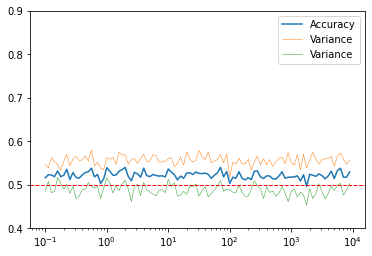

In [90]:
plt.plot(scores.keys(), [x for x, y in scores.values()], label = "Accuracy")
plt.plot(scores.keys(), [x + y**(0.5) for x, y in scores.values()], label = "Variance", linewidth=0.5)
plt.plot(scores.keys(), [x - y**(0.5) for x, y in scores.values()], label = "Variance", linewidth=0.5)
plt.legend()
plt.ylim([0.4,0.9])
plt.xscale('log')
plt.axhline(0.5, color = "red", linewidth=1, linestyle="--")
plt.show()